## TODO
- Explain how ASPV fails to prevent all leaks in experiment 2
- Verify that edge defense metrics are correct (controller.py:47)
- Change out data source for CAIDA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import controller
import random

BASE_SCENARIO = './ca_gb/ca_gb_cleaned_ranked.lotus'
# seed = random.random()
seed = 0.4193847805409324

0.4193847805409324

# Vary ASPA and ASPV

In [3]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results_1 = controller.main(BASE_SCENARIO+".pickle", all_asns, "aspa_random", verbose=False, iterations=100, usr_seed=seed)
results_1

array([[0.        , 0.1375904 , 0.19526625, 0.30725801, 0.63262844],
       [0.        , 0.08532876, 0.18218719, 0.33008882, 0.65119987],
       [0.        , 0.1026948 , 0.19933893, 0.34016893, 0.66781647],
       [0.        , 0.12202341, 0.20905032, 0.38718246, 0.69167612],
       [0.        , 0.12896528, 0.25393099, 0.44236626, 0.71      ]])

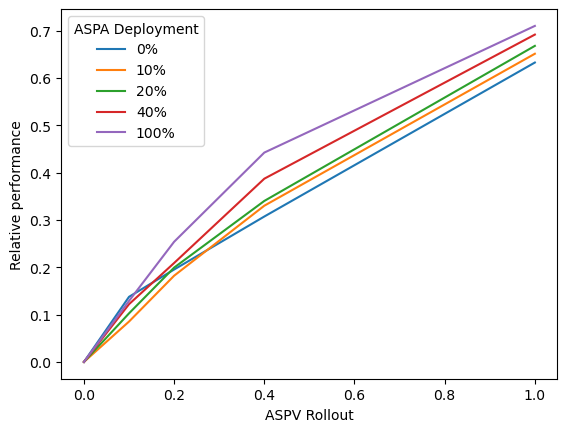

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
labels=[0.0, 0.1, 0.2, 0.4, 1.0]
df = pd.DataFrame(results_1, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Rollout")
plt.show()

In [5]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results_2 = controller.main(BASE_SCENARIO+".pickle", all_asns, "aspa_random", verbose=False, iterations=100, usr_seed=seed, aspv_level=2)
results_2

array([[0.        , 0.        , 0.00333333, 0.00337607, 0.00350427],
       [0.        , 0.00350427, 0.00363248, 0.00376068, 0.0041453 ],
       [0.        , 0.00012821, 0.00012821, 0.00367521, 0.0041453 ],
       [0.        , 0.00017094, 0.00358974, 0.00363248, 0.0041453 ],
       [0.        , 0.00337607, 0.00346154, 0.00376068, 0.0041453 ]])

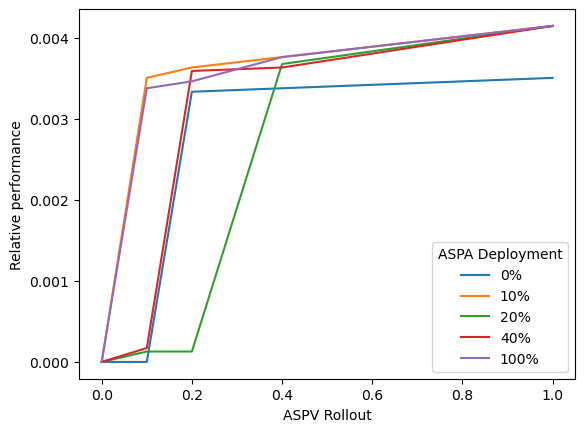

In [6]:
labels=[0.0, 0.1, 0.2, 0.4, 1.0]
df = pd.DataFrame(results_2, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Rollout")
plt.show()

## Random Deployment

In [7]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "protect_random", verbose=False)

0.9222995095358408
         0.0         0.1         0.2         0.3         0.4         0.5  \
count  100.0  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.0    0.069456    0.121920    0.203843    0.284283    0.333032   
std      0.0    0.225208    0.291658    0.368016    0.407174    0.429834   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.0    0.000000    0.000000    0.000000    0.000000    0.010196   
75%      0.0    0.000000    0.029291    0.170940    0.513889    0.982143   
max      0.0    1.000000    1.000000    1.000000    1.000000    1.000000   

              0.6         0.7         0.8         0.9         1.0  
count  100.000000  100.000000  100.000000  100.000000  100.000000  
mean     0.407748    0.462681    0.506964    0.572219    0.605896  
std      0.456033    0.473693    0.480231    0.487295    0.487149  
min      0.000000    0.0

<AxesSubplot: xlabel='Global ASPV Deployment', ylabel='Avg. Improvement'>

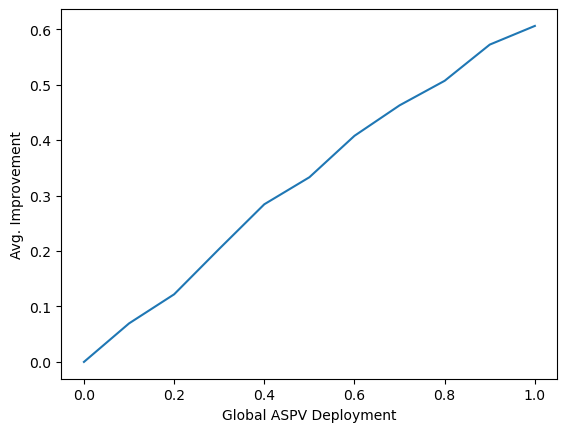

In [8]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment", ylabel="Avg. Improvement")

## Deployment at Edge of AS Network

In [ ]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df = controller.main(BASE_SCENARIO+".pickle", all_asns, "international_edge_defense", verbose=False)

In [ ]:
m = df.mean()
m.columns = ["ASPV Deployment Rate", "Avg. Improvement"]
m.plot(x="ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPV Deployment Rate", ylabel="Avg. Improvement")